# Practice Project: Loan Risk Analysis
***
<b>DESCRIPTION</b>

PeerLoanKart is an NBFC (Non-banking Financial Company) that facilitates peer- to-peer loan. It connects people who need money (borrowers) with people who have money (investors). As an investor, you would want to invest in people who have a high probability of paying you back. You as an ML expert create a model that will help predict whether a borrower will pay the loan or not.
 

<b>Objective:</b> Increase profits up to 20% as NPA will be reduced due to loan disbursal for only creditworthy borrowers.

In [62]:
#data table and array operation
import pandas as pd
import numpy as np
#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#handle unwanted warnings 
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
#consistent plots
from pylab import rcParams
rcParams['figure.figsize']= 12,5
rcParams['axes.labelsize']= 12
rcParams['xtick.labelsize']= 12
rcParams['ytick.labelsize']= 12
#view all the columns
pd.options.display.max_columns = None

In [63]:
#load the data 
loan = pd.read_csv('loan_borowwer_data.csv',delimiter=',',engine='python')
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [64]:
#check info
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [65]:
#check the basic stats
loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [66]:
#check the balance of the data
loan['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

_The data is highly imbalanced. There are more data points for approved loans compared to the negative class which is denied loans_ 

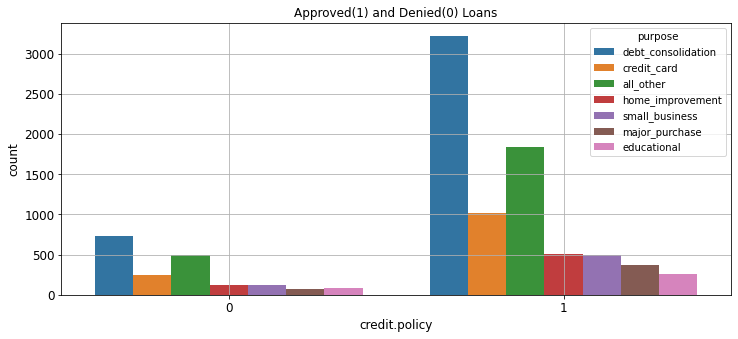

In [67]:
sns.countplot(loan['credit.policy'],hue = loan['purpose'])
plt.title('Approved(1) and Denied(0) Loans')
plt.grid()
plt.show()

_Debt consolidation is the biggest purpose for which the loan is taken. Loans for education are the least._

In [68]:
loan['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

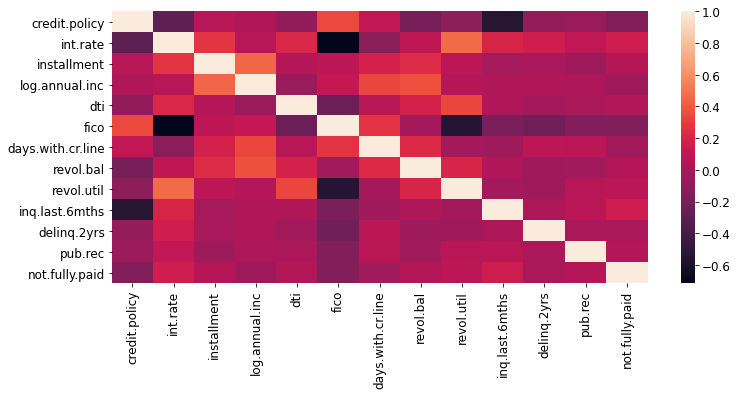

In [69]:
#check the correlation on heatmap
sns.heatmap(loan.corr())
plt.show()

_There is high multi-collinearity in the dataset. One way to deal with this would be use dimensionality reduction and feature selection techniques like PCA_

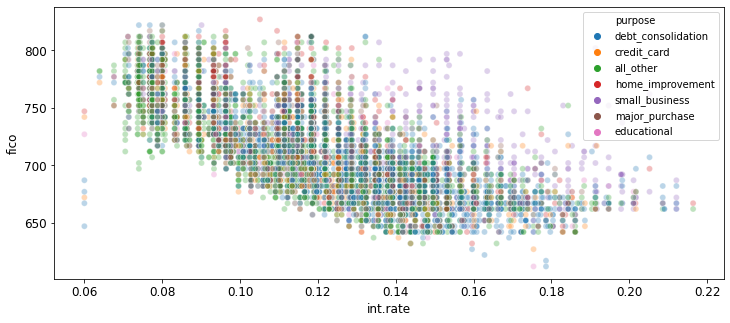

In [70]:
sns.scatterplot('int.rate','fico',hue='purpose',data=loan,alpha=0.3)
plt.show()

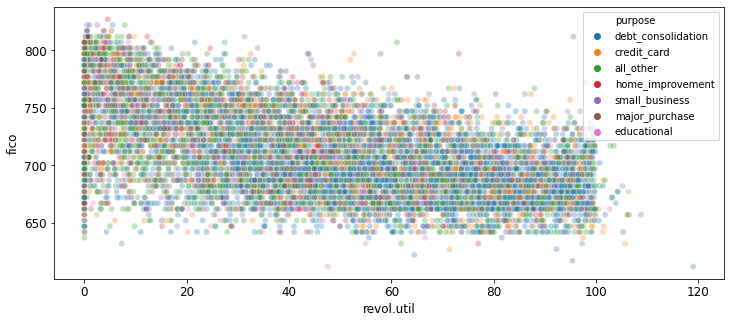

In [71]:
sns.scatterplot('revol.util','fico',hue='purpose',data=loan,alpha=0.3)
plt.show()

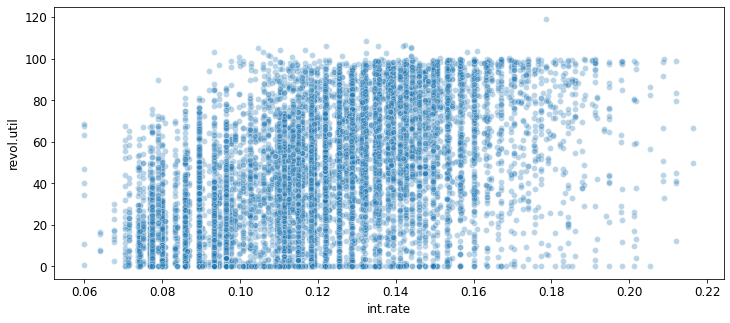

In [72]:
sns.scatterplot('int.rate','revol.util',data=loan,alpha=0.3)
plt.show()

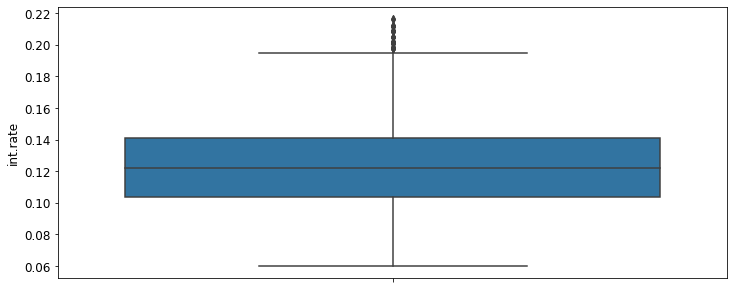

In [73]:
sns.boxplot(loan['int.rate'],orient='v')
plt.show()

In [74]:
#check the correlation .. 
loan.corr()['credit.policy']

credit.policy        1.000000
int.rate            -0.294089
installment          0.058770
log.annual.inc       0.034906
dti                 -0.090901
fico                 0.348319
days.with.cr.line    0.099026
revol.bal           -0.187518
revol.util          -0.104095
inq.last.6mths      -0.535511
delinq.2yrs         -0.076318
pub.rec             -0.054243
not.fully.paid      -0.158119
Name: credit.policy, dtype: float64

In [75]:
#encode the loan purpose
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
loan['purpose'] = encoder.fit_transform(loan['purpose'])
loan.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


In [76]:
loan['purpose'].value_counts().sort_values(ascending=False)

2    3957
0    2331
1    1262
4     629
6     619
5     437
3     343
Name: purpose, dtype: int64

In [77]:
#split the dataset 
from sklearn.model_selection import train_test_split
seed = 42
test_size =0.2
train_set, test_set = train_test_split(loan,test_size=test_size,random_state=seed,
                                       shuffle=loan['credit.policy'])
train_set.shape, test_set.shape

((7662, 14), (1916, 14))

In [78]:
train_set['credit.policy'].value_counts()/len(train_set)

1    0.804751
0    0.195249
Name: credit.policy, dtype: float64

In [79]:
test_set['credit.policy'].value_counts()/len(test_set)

1    0.805846
0    0.194154
Name: credit.policy, dtype: float64

In [80]:
#split into the input and output 
X_train = train_set.drop('credit.policy',axis=1)
y_train = train_set['credit.policy']

X_test = test_set.drop('credit.policy',axis=1)
y_test = test_set['credit.policy']

In [81]:
# Power Transform
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

In [82]:
#scale the inputs
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
#reduce the dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [84]:
pca.n_components_

11

In [85]:
#modeling 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#evaluation 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import confusion_matrix

In [86]:
classifiers = {'Logistic Regression':LogisticRegression(),
               'Random Forest':RandomForestClassifier(random_state=seed)}
               

for key,model in classifiers.items():
    model.fit(X_train,y_train)
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)
    print('Model {}'.format(key))
    print('Train Data Precision Score',precision_score(y_train,train_predict))
    print('Test Data Precision Score',precision_score(y_test,test_predict))   
    #print the classification report based on predictions of the test data .. 
    print('{key} Classification Report')
    print('...............................')
    print(classification_report(y_test,test_predict))
    print(confusion_matrix(y_test,test_predict))
    
    

Model Logistic Regression
Train Data Precision Score 0.8940626883664858
Test Data Precision Score 0.8922155688622755
{key} Classification Report
...............................
              precision    recall  f1-score   support

           0       0.78      0.52      0.62       372
           1       0.89      0.97      0.93      1544

    accuracy                           0.88      1916
   macro avg       0.84      0.74      0.77      1916
weighted avg       0.87      0.88      0.87      1916

[[ 192  180]
 [  54 1490]]
Model Random Forest
Train Data Precision Score 1.0
Test Data Precision Score 0.9105839416058394
{key} Classification Report
...............................
              precision    recall  f1-score   support

           0       0.83      0.60      0.70       372
           1       0.91      0.97      0.94      1544

    accuracy                           0.90      1916
   macro avg       0.87      0.79      0.82      1916
weighted avg       0.89      0.90      0.

In [87]:
#confusion matrix for random forest model
pd.crosstab(y_test,test_predict)

col_0,0,1
credit.policy,,
0,225,147
1,47,1497


_The model predicts a lot of false positives instead of true negatives. There should not be cases where the loan is disbursed to a person who is not likely to return the money.This could be very dangerous for the company and would result in bad loans_

In [89]:
from sklearn.model_selection import cross_val_predict
y_probas_forest = cross_val_predict(classifier,X_train,y_train,cv=5,method='predict_proba')

In [90]:
y_scores_forest = y_probas_forest[:,1] #score =  proba of the positive class 
fpr_forest,tpr_forest,threshold_forest = roc_curve(y_train,y_scores_forest)

In [91]:
from sklearn.metrics import plot_roc_curve,roc_auc_score
roc_auc_score(y_train,y_scores_forest)

0.9379928810052018

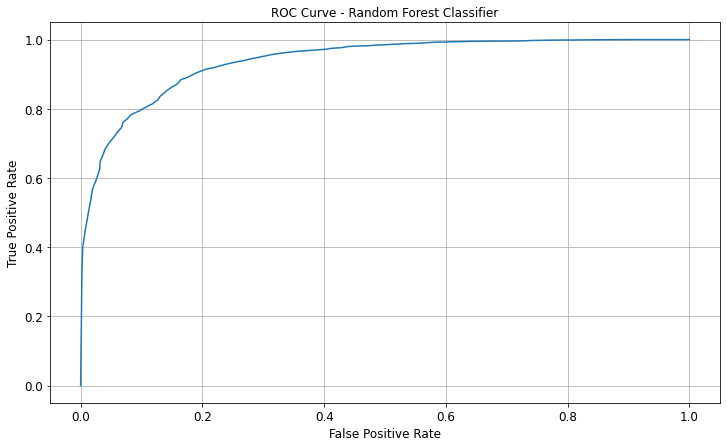

In [92]:
#ROC or Receiver Operating Characteristics Curve
plt.figure(figsize=(12,7))
plt.plot(fpr_forest,tpr_forest)
plt.title('ROC Curve - Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

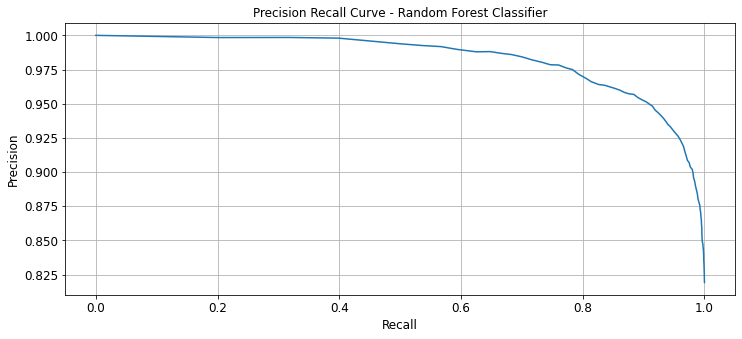

In [98]:
#precision recall curve
precisions,recalls,thresholds = precision_recall_curve(y_train,y_scores_forest)
plt.plot(recalls,precisions)
plt.title('Precision Recall Curve - Random Forest Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()